In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! ls

hw1.ipynb                       yellow_tripdata_2023-01.parquet
poetry.lock                     yellow_tripdata_2023-02.parquet
pyproject.toml


In [4]:
df = pd.read_parquet('./yellow_tripdata_2023-01.parquet')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
# Q 1
len(df.columns)

19

In [7]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [8]:
df.head().T

,0,1,2,3,4
VendorID,2,2,2,1,2
tpep_pickup_datetime,2023-01-01 00:32:10,2023-01-01 00:55:08,2023-01-01 00:25:04,2023-01-01 00:03:48,2023-01-01 00:10:29
tpep_dropoff_datetime,2023-01-01 00:40:36,2023-01-01 01:01:27,2023-01-01 00:37:49,2023-01-01 00:13:25,2023-01-01 00:21:19
passenger_count,1.0,1.0,1.0,0.0,1.0
trip_distance,0.97,1.1,2.51,1.9,1.43
RatecodeID,1.0,1.0,1.0,1.0,1.0
store_and_fwd_flag,N,N,N,N,N
PULocationID,161,43,48,138,107
DOLocationID,141,237,238,7,79
payment_type,2,1,1,1,1


In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [10]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count   3066766.000
mean         15.669
std          42.594
min         -29.200
50%          11.517
95%          36.467
98%          48.733
99%          57.250
max       10029.183
Name: duration, dtype: float64

/var/folders/j2/2mk053214s1bxflgkk9jypvw0000gr/T/ipykernel_9077/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

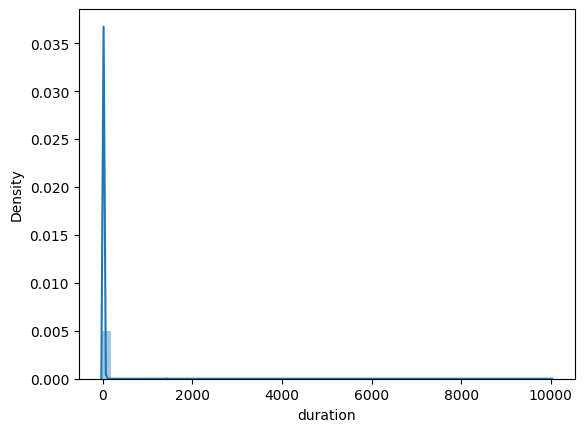

In [11]:
sns.distplot(df.duration)

In [12]:
# Q2
df['duration'].std()

42.59435124195458

In [13]:
size_before_cleaning = df.shape[0]

In [14]:
df = df.query('1 <= duration <= 60')

In [15]:
size_after_cleaning = df.shape[0]

In [16]:
# Q3
100 * size_after_cleaning / size_before_cleaning

98.1220282212598

In [17]:
categorical = ["PULocationID", "DOLocationID"]
numerical = ['trip_distance']

In [18]:
df[categorical] = df[categorical].astype(str)

In [19]:
from sklearn.feature_extraction import DictVectorizer

In [20]:
df[categorical + numerical].iloc[:2].to_dict(orient='records')

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1}]

In [21]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [22]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [23]:
# Q4
X_train.shape[1]

516

In [24]:
dv.feature_names_[:3]

['DOLocationID=1', 'DOLocationID=10', 'DOLocationID=100']

In [25]:
target = 'duration'
y_train = df[target].values

In [26]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_train)

/var/folders/j2/2mk053214s1bxflgkk9jypvw0000gr/T/ipykernel_9077/2943976952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="prediction")
/var/folders/j2/2mk053214s1bxflgkk9jypvw0000gr/T/ipykernel_9077/2943976952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

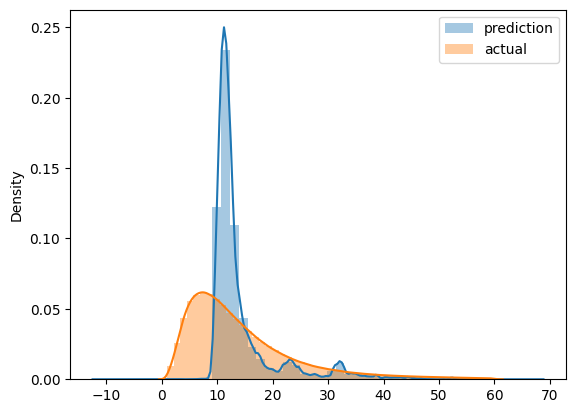

In [30]:
sns.distplot(y_pred, label="prediction")
sns.distplot(y_train, label="actual")
plt.legend()

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# Q5
mean_squared_error(y_train, y_pred, squared=False)

/Users/aburtsev/Library/Caches/pypoetry/virtualenvs/mlops-zoomcamp-vBquemNI-py3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.658813384236691

In [33]:
# validation

In [34]:
df2 = pd.read_parquet('./yellow_tripdata_2023-02.parquet')

In [52]:
df2['duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60
df2 = df2.query('1 <= duration <= 60')
df2[categorical] = df2[categorical].astype(str)
validate_dicts = df2[categorical + numerical].to_dict(orient='records')
X_valid = dv.transform(validate_dicts)
y_valid = df2[target].values

In [53]:
y_valid_pred = lr.predict(X_valid)

In [56]:
# Q6
mean_squared_error(y_valid, y_valid_pred, squared=False)

/Users/aburtsev/Library/Caches/pypoetry/virtualenvs/mlops-zoomcamp-vBquemNI-py3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.820203893965551